In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import matplotlib

In [82]:
df = pd.read_csv('Book1.csv')
df.head()

,Date,SUNTECK,RELIANCE,MPHASIS,LALPATHLABS,KANSAINEROLAC,ICICIBANK,HCLTECH,FRETAIL,ASAHIINDIA,TECHM
0,23-03-2020,182.149994,880.742920,616.619812,1251.949951,296.810150,284.000000,415.866760,106.400002,138.750000,483.257935
1,24-03-2020,179.949997,939.870972,653.928162,1341.800049,308.166809,296.500000,440.690155,101.099998,141.050003,499.426056
2,25-03-2020,197.000000,1078.201538,698.438843,1399.000000,324.978607,316.899994,456.192352,96.050003,134.949997,522.438354
3,26-03-2020,204.199997,1062.211548,662.330933,1414.949951,341.939178,330.250000,446.322784,91.250000,141.250000,511.031403
4,27-03-2020,210.350006,1061.613770,659.065857,1501.949951,354.486053,339.850006,429.325226,86.699997,149.899994,500.021210


In [83]:
returns = df.dropna()

In [84]:
returns.describe()

,SUNTECK,RELIANCE,MPHASIS,LALPATHLABS,KANSAINEROLAC,ICICIBANK,HCLTECH,FRETAIL,ASAHIINDIA,TECHM
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,179.607692,1561.865886,819.992220,1612.887363,395.116472,342.346703,545.715595,97.440110,165.473626,552.993331
std,16.468996,309.832830,144.399002,165.459111,39.454557,23.017211,75.058583,19.578246,12.558717,48.665283
min,146.750000,880.742920,615.947632,1251.949951,296.810150,284.000000,404.551666,63.849998,134.949997,483.257935
25%,166.574997,1417.562317,692.076752,1518.525024,365.445953,330.449997,485.925583,80.674999,157.400002,516.462098
50%,181.300003,1531.947754,816.413879,1568.599976,388.655182,344.649994,550.052734,98.099998,167.750000,540.342285
75%,190.925003,1774.125000,878.539856,1644.525024,435.274994,357.850006,577.268768,110.324997,174.500000,577.117279
max,212.600006,2177.699951,1164.400024,1979.800049,462.600006,392.250000,712.450012,142.399994,192.300003,684.349976


In [32]:
df.

ValueError: ignored

In [85]:
del df['Date']

In [86]:
df.describe()

,SUNTECK,RELIANCE,MPHASIS,LALPATHLABS,KANSAINEROLAC,ICICIBANK,HCLTECH,FRETAIL,ASAHIINDIA,TECHM
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,179.607692,1561.865886,819.992220,1612.887363,395.116472,342.346703,545.715595,97.440110,165.473626,552.993331
std,16.468996,309.832830,144.399002,165.459111,39.454557,23.017211,75.058583,19.578246,12.558717,48.665283
min,146.750000,880.742920,615.947632,1251.949951,296.810150,284.000000,404.551666,63.849998,134.949997,483.257935
25%,166.574997,1417.562317,692.076752,1518.525024,365.445953,330.449997,485.925583,80.674999,157.400002,516.462098
50%,181.300003,1531.947754,816.413879,1568.599976,388.655182,344.649994,550.052734,98.099998,167.750000,540.342285
75%,190.925003,1774.125000,878.539856,1644.525024,435.274994,357.850006,577.268768,110.324997,174.500000,577.117279
max,212.600006,2177.699951,1164.400024,1979.800049,462.600006,392.250000,712.450012,142.399994,192.300003,684.349976


In [159]:
returns = df.pct_change().dropna()

In [111]:
returns.head()

,SUNTECK,RELIANCE,MPHASIS,LALPATHLABS,KANSAINEROLAC,ICICIBANK,HCLTECH,FRETAIL,ASAHIINDIA,TECHM
1,-0.012078,0.067134,0.060505,0.071768,0.038262,0.044014,0.059691,-0.049812,0.016577,0.033457
2,0.094749,0.147180,0.068067,0.042629,0.054554,0.068803,0.035177,-0.049950,-0.043247,0.046077
3,0.036548,-0.014830,-0.051698,0.011401,0.052190,0.042127,-0.021635,-0.049974,0.046684,-0.021834
4,0.030118,-0.000563,-0.004930,0.061486,0.036693,0.029069,-0.038084,-0.049863,0.061239,-0.021545
5,0.010696,-0.032986,-0.065423,-0.051400,0.014410,-0.077828,-0.027052,-0.049596,-0.004336,0.045031


In [89]:
returns.columns

Index(['SUNTECK', 'RELIANCE', 'MPHASIS', 'LALPATHLABS', 'KANSAINEROLAC',
       'ICICIBANK', 'HCLTECH', 'FRETAIL', 'ASAHIINDIA', 'TECHM'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  import sys


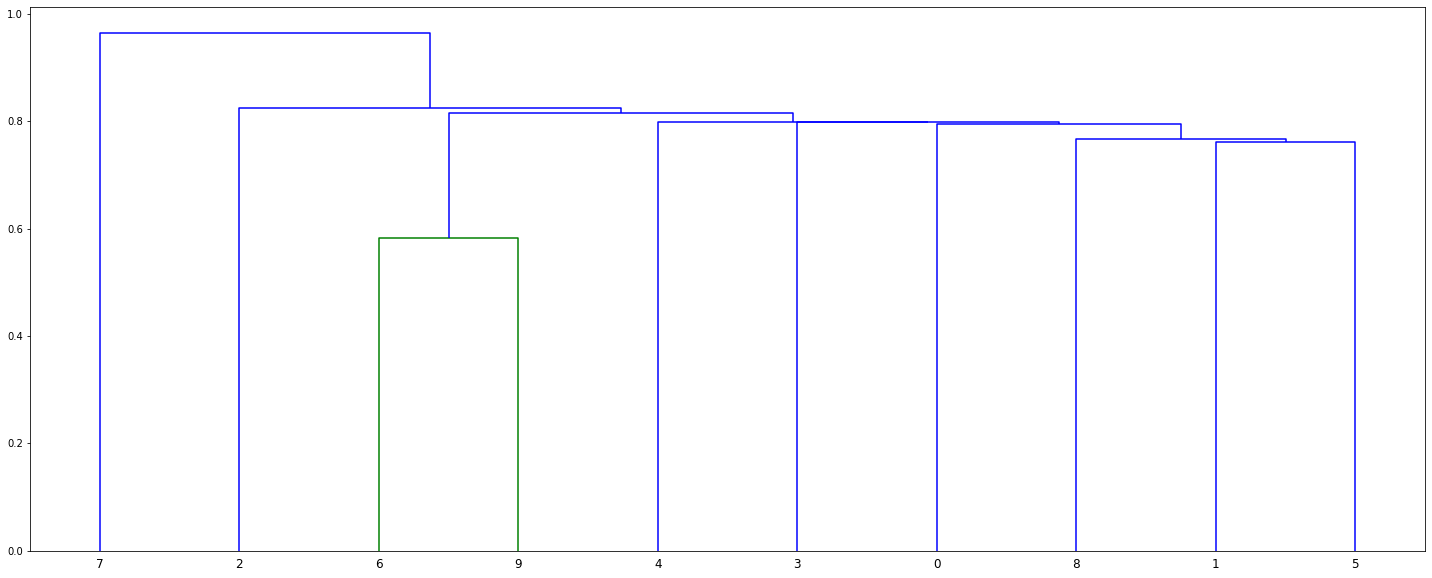

In [90]:
# correlation matrix
corr = returns.corr()

# distance matrix
d_corr = np.sqrt(0.5*(1-corr))

link = linkage(d_corr, 'single')
Z = pd.DataFrame(link)

fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
# plt.show()

In [91]:
Z

,0,1,2,3
0,6.0,9.0,0.583095,2.0
1,1.0,5.0,0.761026,2.0
2,8.0,11.0,0.766858,3.0
3,0.0,12.0,0.795264,4.0
4,3.0,13.0,0.798202,5.0
5,4.0,14.0,0.799119,6.0
6,10.0,15.0,0.816018,8.0
7,2.0,16.0,0.824292,9.0
8,7.0,17.0,0.963989,10.0


In [92]:
def get_quasi_diag(link):
    
    # sort clustered items by distance
    
    link = link.astype(int)
    
    # get the first and the second item of the last tuple
    sort_ix = pd.Series([link[-1,0], link[-1,1]]) 
    
    # the total num of items is the third item of the last list
    num_items = link[-1, 3]
    
    # if the max of sort_ix is bigger than or equal to the max_items
    while sort_ix.max() >= num_items:
        # assign sort_ix index with 24 x 24
        sort_ix.index = range(0, sort_ix.shape[0]*2, 2) # odd numers as index
        
        df0 = sort_ix[sort_ix >= num_items] # find clusters
        
        # df0 contain even index and cluster index
        i = df0.index
        j = df0.values - num_items # 
        
        sort_ix[i] = link[j,0] # item 1
        
        df0  = pd.Series(link[j, 1], index=i+1)
        
        sort_ix = sort_ix.append(df0)
        sort_ix = sort_ix.sort_index()
        
        sort_ix.index = range(sort_ix.shape[0])
        
    
    return sort_ix.tolist()

In [93]:
sort_ix = get_quasi_diag(link)
sort_ix

[7, 2, 6, 9, 4, 3, 0, 8, 1, 5]

In [94]:
def get_cluster_var(cov, c_items):
    cov_ = cov.iloc[c_items, c_items] # matrix slice
    # calculate the inversev-variance portfolio
    ivp = 1./np.diag(cov_)
    ivp/=ivp.sum()
    w_ = ivp.reshape(-1,1)
    c_var = np.dot(np.dot(w_.T, cov_), w_)[0,0]
    return c_var
def get_rec_bipart(cov, sort_ix):
    # compute HRP allocation
    # intialize weights of 1
    w = pd.Series(1, index=sort_ix)
    
    # intialize all items in one cluster
    c_items = [sort_ix]
    while len(c_items) > 0:
        # bisection
        """
        [[3, 6, 0, 9, 2, 4, 13], [5, 12, 8, 10, 7, 1, 11]]
        [[3, 6, 0], [9, 2, 4, 13], [5, 12, 8], [10, 7, 1, 11]]
        [[3], [6, 0], [9, 2], [4, 13], [5], [12, 8], [10, 7], [1, 11]]
        [[6], [0], [9], [2], [4], [13], [12], [8], [10], [7], [1], [11]]
        """
        c_items = [i[int(j):int(k)] for i in c_items for j,k in 
                   ((0,len(i)/2),(len(i)/2,len(i))) if len(i)>1]
        
        # now it has 2
        for i in range(0, len(c_items), 2):
            
            c_items0 = c_items[i] # cluster 1
            c_items1 = c_items[i+1] # cluter 2
            
            c_var0 = get_cluster_var(cov, c_items0)
            c_var1 = get_cluster_var(cov, c_items1)
            
            alpha = 1 - c_var0/(c_var0+c_var1)
            
            w[c_items0] *= alpha
            w[c_items1] *=1-alpha
    return w

In [139]:
cov = returns.cov()
weights = get_rec_bipart(cov, sort_ix)

new_index = [returns.columns[i] for i in weights.index]
weights.index = new_index

weights

FRETAIL          0.074049
MPHASIS          0.159047
HCLTECH          0.118898
TECHM            0.097567
KANSAINEROLAC    0.099662
LALPATHLABS      0.185103
SUNTECK          0.073141
ASAHIINDIA       0.098355
RELIANCE         0.057044
ICICIBANK        0.037133
dtype: float64

In [96]:
df.head()

,SUNTECK,RELIANCE,MPHASIS,LALPATHLABS,KANSAINEROLAC,ICICIBANK,HCLTECH,FRETAIL,ASAHIINDIA,TECHM
0,182.149994,880.742920,616.619812,1251.949951,296.810150,284.000000,415.866760,106.400002,138.750000,483.257935
1,179.949997,939.870972,653.928162,1341.800049,308.166809,296.500000,440.690155,101.099998,141.050003,499.426056
2,197.000000,1078.201538,698.438843,1399.000000,324.978607,316.899994,456.192352,96.050003,134.949997,522.438354
3,204.199997,1062.211548,662.330933,1414.949951,341.939178,330.250000,446.322784,91.250000,141.250000,511.031403
4,210.350006,1061.613770,659.065857,1501.949951,354.486053,339.850006,429.325226,86.699997,149.899994,500.021210


In [97]:
columns = returns.columns
list(columns)

returns['ew'] = 0


for i in columns:
  returns['ew'] = returns['ew'] + returns[i]

In [98]:
returns.head()

,SUNTECK,RELIANCE,MPHASIS,LALPATHLABS,KANSAINEROLAC,ICICIBANK,HCLTECH,FRETAIL,ASAHIINDIA,TECHM,ew
1,-0.012078,0.067134,0.060505,0.071768,0.038262,0.044014,0.059691,-0.049812,0.016577,0.033457,0.329517
2,0.094749,0.147180,0.068067,0.042629,0.054554,0.068803,0.035177,-0.049950,-0.043247,0.046077,0.464039
3,0.036548,-0.014830,-0.051698,0.011401,0.052190,0.042127,-0.021635,-0.049974,0.046684,-0.021834,0.028979
4,0.030118,-0.000563,-0.004930,0.061486,0.036693,0.029069,-0.038084,-0.049863,0.061239,-0.021545,0.103621
5,0.010696,-0.032986,-0.065423,-0.051400,0.014410,-0.077828,-0.027052,-0.049596,-0.004336,0.045031,-0.238485


In [99]:
returns['ew'] = returns['ew']/10

In [100]:
df.index

RangeIndex(start=0, stop=91, step=1)

In [101]:
df

,SUNTECK,RELIANCE,MPHASIS,LALPATHLABS,KANSAINEROLAC,ICICIBANK,HCLTECH,FRETAIL,ASAHIINDIA,TECHM
0,182.149994,880.742920,616.619812,1251.949951,296.810150,284.000000,415.866760,106.400002,138.750000,483.257935
1,179.949997,939.870972,653.928162,1341.800049,308.166809,296.500000,440.690155,101.099998,141.050003,499.426056
2,197.000000,1078.201538,698.438843,1399.000000,324.978607,316.899994,456.192352,96.050003,134.949997,522.438354
3,204.199997,1062.211548,662.330933,1414.949951,341.939178,330.250000,446.322784,91.250000,141.250000,511.031403
4,210.350006,1061.613770,659.065857,1501.949951,354.486053,339.850006,429.325226,86.699997,149.899994,500.021210
...,...,...,...,...,...,...,...,...,...,...
86,179.949997,2096.649902,1142.050049,1910.300049,432.600006,351.049988,694.400024,110.449997,168.550003,676.400024
87,183.000000,2108.850098,1155.199951,1881.050049,419.350006,344.950012,695.450012,115.949997,168.800003,674.750000
88,187.050003,2067.100098,1157.949951,1891.699951,433.549988,346.799988,705.200012,110.199997,171.850006,681.650024
89,182.050003,2009.000000,1144.599976,1865.300049,442.750000,343.250000,705.950012,104.699997,174.850006,673.599976


In [135]:
c = (df.iloc[90]-df.iloc[0])/df.iloc[0]

In [136]:
c

SUNTECK          0.046116
RELIANCE         1.441802
MPHASIS          0.790163
LALPATHLABS      0.469867
KANSAINEROLAC    0.457329
ICICIBANK        0.235915
HCLTECH          0.665558
FRETAIL          0.027726
ASAHIINDIA       0.283604
TECHM            0.350521
dtype: float64

In [137]:
d = 0
for i in columns:
  d = d+c[i]

d

4.768600352268834

In [131]:
c = c*weights

In [132]:
c

ASAHIINDIA       0.027894
FRETAIL          0.002053
HCLTECH          0.079134
ICICIBANK        0.008760
KANSAINEROLAC    0.045578
LALPATHLABS      0.086974
MPHASIS          0.125673
RELIANCE         0.082246
SUNTECK          0.003373
TECHM            0.034199
dtype: float64

In [133]:
d = 0
for i in columns:
  d = d+c[i]

d

0.49588399174998277

In [114]:
np.random.seed(42)
num_ports = 6000
all_weights = np.zeros((num_ports, len(returns.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(10))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (returns.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]


In [115]:
sharpe_arr.max()

5.542586217706546

In [116]:
sharpe_arr.argmax()

5816

In [117]:
print(all_weights[5816,:])

[0.02136689 0.22848799 0.11742261 0.09469107 0.09013959 0.00241058
 0.23221643 0.04543684 0.16279953 0.00502847]


In [151]:
weights = all_weights[5816,:]
weights

array([0.02136689, 0.22848799, 0.11742261, 0.09469107, 0.09013959,
       0.00241058, 0.23221643, 0.04543684, 0.16279953, 0.00502847])

In [124]:
d = 0
for i in columns:
  d = d+c[i]

d

0.7132334946322033

In [138]:
returns.head()

,SUNTECK,RELIANCE,MPHASIS,LALPATHLABS,KANSAINEROLAC,ICICIBANK,HCLTECH,FRETAIL,ASAHIINDIA,TECHM
1,-0.012078,0.067134,0.060505,0.071768,0.038262,0.044014,0.059691,-0.049812,0.016577,0.033457
2,0.094749,0.147180,0.068067,0.042629,0.054554,0.068803,0.035177,-0.049950,-0.043247,0.046077
3,0.036548,-0.014830,-0.051698,0.011401,0.052190,0.042127,-0.021635,-0.049974,0.046684,-0.021834
4,0.030118,-0.000563,-0.004930,0.061486,0.036693,0.029069,-0.038084,-0.049863,0.061239,-0.021545
5,0.010696,-0.032986,-0.065423,-0.051400,0.014410,-0.077828,-0.027052,-0.049596,-0.004336,0.045031


In [140]:
returns['daily_returns'] = returns.dot(weights)

In [141]:
returns

,SUNTECK,RELIANCE,MPHASIS,LALPATHLABS,KANSAINEROLAC,ICICIBANK,HCLTECH,FRETAIL,ASAHIINDIA,TECHM,daily_returns
1,-0.012078,0.067134,0.060505,0.071768,0.038262,0.044014,0.059691,-0.049812,0.016577,0.033457,0.039605
2,0.094749,0.147180,0.068067,0.042629,0.054554,0.068803,0.035177,-0.049950,-0.043247,0.046077,0.042760
3,0.036548,-0.014830,-0.051698,0.011401,0.052190,0.042127,-0.021635,-0.049974,0.046684,-0.021834,-0.001331
4,0.030118,-0.000563,-0.004930,0.061486,0.036693,0.029069,-0.038084,-0.049863,0.061239,-0.021545,0.013205
5,0.010696,-0.032986,-0.065423,-0.051400,0.014410,-0.077828,-0.027052,-0.049596,-0.004336,0.045031,-0.025395
...,...,...,...,...,...,...,...,...,...,...,...
86,0.014946,-0.037218,-0.019194,-0.018623,-0.009162,-0.002982,-0.025335,0.049905,0.012008,-0.011617,-0.007823
87,0.016949,0.005819,0.011514,-0.015312,-0.030629,-0.017376,0.001512,0.049796,0.001483,-0.002439,0.000646
88,0.022131,-0.019798,0.002381,0.005662,0.033862,0.005363,0.014020,-0.049590,0.018069,0.010226,0.006260
89,-0.026731,-0.028107,-0.011529,-0.013956,0.021220,-0.010236,0.001064,-0.049909,0.017457,-0.011810,-0.009245


In [142]:
cumu_returns_daily = (1+returns).cumprod()

In [143]:
cumu_returns_daily.tail(5)

,SUNTECK,RELIANCE,MPHASIS,LALPATHLABS,KANSAINEROLAC,ICICIBANK,HCLTECH,FRETAIL,ASAHIINDIA,TECHM,daily_returns
86,0.987922,2.380547,1.852114,1.525860,1.457497,1.236092,1.669766,1.038064,1.214775,1.399667,1.516262
87,1.004667,2.394399,1.873440,1.502496,1.412856,1.214613,1.672290,1.089756,1.216577,1.396252,1.517242
88,1.026901,2.346996,1.877899,1.511003,1.460698,1.221127,1.695735,1.035714,1.238559,1.410530,1.526739
89,0.999451,2.281029,1.856249,1.489916,1.491694,1.208627,1.697539,0.984023,1.260180,1.393873,1.512624
90,1.046116,2.441802,1.790163,1.469867,1.457329,1.235915,1.665558,1.027726,1.283604,1.350521,1.509095


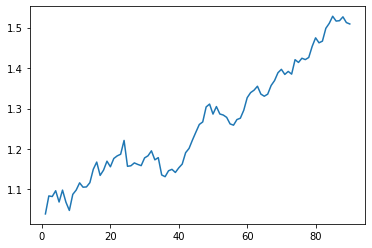

In [144]:
cumu_returns_daily['daily_returns'].plot()

In [145]:
matrix_covariance_portfolio = (returns.iloc[:,:-1].cov())*252

In [146]:
matrix_covariance_portfolio

,SUNTECK,RELIANCE,MPHASIS,LALPATHLABS,KANSAINEROLAC,ICICIBANK,HCLTECH,FRETAIL,ASAHIINDIA,TECHM
SUNTECK,0.351497,0.081206,0.004022,0.054910,0.077759,0.156361,0.020913,0.019395,0.102949,0.030648
RELIANCE,0.081206,0.273581,0.052307,0.035619,0.044232,0.153045,0.086879,0.032438,0.052954,0.084496
MPHASIS,0.004022,0.052307,0.245844,0.039691,0.046754,0.067810,0.081251,-0.036117,0.007926,0.059827
LALPATHLABS,0.054910,0.035619,0.039691,0.138890,0.017312,0.098272,0.045220,-0.025413,0.037492,0.031182
KANSAINEROLAC,0.077759,0.044232,0.046754,0.017312,0.186456,0.096245,0.045594,0.011783,0.078146,0.046449
ICICIBANK,0.156361,0.153045,0.067810,0.098272,0.096245,0.420274,0.113340,0.012731,0.141306,0.075041
HCLTECH,0.020913,0.086879,0.081251,0.045220,0.045594,0.113340,0.194811,-0.034314,0.017373,0.128632
FRETAIL,0.019395,0.032438,-0.036117,-0.025413,0.011783,0.012731,-0.034314,0.528036,0.056088,-0.005963
ASAHIINDIA,0.102949,0.052954,0.007926,0.037492,0.078146,0.141306,0.017373,0.056088,0.228668,0.031371
TECHM,0.030648,0.084496,0.059827,0.031182,0.046449,0.075041,0.128632,-0.005963,0.031371,0.190460


In [147]:
portfolio_variance = np.dot(weights.T,np.dot(matrix_covariance_portfolio,weights))

In [150]:
np.sqrt(portfolio_variance)

0.30084257585732915

In [154]:
returns['daily_returns'] = returns.dot(weights)
returns

,SUNTECK,RELIANCE,MPHASIS,LALPATHLABS,KANSAINEROLAC,ICICIBANK,HCLTECH,FRETAIL,ASAHIINDIA,TECHM,daily_returns
1,-0.012078,0.067134,0.060505,0.071768,0.038262,0.044014,0.059691,-0.049812,0.016577,0.033457,0.047002
2,0.094749,0.147180,0.068067,0.042629,0.054554,0.068803,0.035177,-0.049950,-0.043247,0.046077,0.051856
3,0.036548,-0.014830,-0.051698,0.011401,0.052190,0.042127,-0.021635,-0.049974,0.046684,-0.021834,-0.002597
4,0.030118,-0.000563,-0.004930,0.061486,0.036693,0.029069,-0.038084,-0.049863,0.061239,-0.021545,0.007888
5,0.010696,-0.032986,-0.065423,-0.051400,0.014410,-0.077828,-0.027052,-0.049596,-0.004336,0.045031,-0.027761
...,...,...,...,...,...,...,...,...,...,...,...
86,0.014946,-0.037218,-0.019194,-0.018623,-0.009162,-0.002982,-0.025335,0.049905,0.012008,-0.011617,-0.014754
87,0.016949,0.005819,0.011514,-0.015312,-0.030629,-0.017376,0.001512,0.049796,0.001483,-0.002439,0.001634
88,0.022131,-0.019798,0.002381,0.005662,0.033862,0.005363,0.014020,-0.049590,0.018069,0.010226,0.003826
89,-0.026731,-0.028107,-0.011529,-0.013956,0.021220,-0.010236,0.001064,-0.049909,0.017457,-0.011810,-0.007019


In [155]:
cumu_returns_daily = (1+returns).cumprod()
cumu_returns_daily.tail(5)

,SUNTECK,RELIANCE,MPHASIS,LALPATHLABS,KANSAINEROLAC,ICICIBANK,HCLTECH,FRETAIL,ASAHIINDIA,TECHM,daily_returns
86,0.987922,2.380547,1.852114,1.525860,1.457497,1.236092,1.669766,1.038064,1.214775,1.399667,1.691423
87,1.004667,2.394399,1.873440,1.502496,1.412856,1.214613,1.672290,1.089756,1.216577,1.396252,1.694187
88,1.026901,2.346996,1.877899,1.511003,1.460698,1.221127,1.695735,1.035714,1.238559,1.410530,1.700668
89,0.999451,2.281029,1.856249,1.489916,1.491694,1.208627,1.697539,0.984023,1.260180,1.393873,1.688732
90,1.046116,2.441802,1.790163,1.469867,1.457329,1.235915,1.665558,1.027726,1.283604,1.350521,1.705852


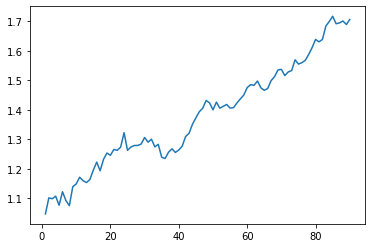

In [156]:
cumu_returns_daily['daily_returns'].plot()

In [157]:
matrix_covariance_portfolio = (returns.iloc[:,:-1].cov())*252
matrix_covariance_portfolio

,SUNTECK,RELIANCE,MPHASIS,LALPATHLABS,KANSAINEROLAC,ICICIBANK,HCLTECH,FRETAIL,ASAHIINDIA,TECHM
SUNTECK,0.351497,0.081206,0.004022,0.054910,0.077759,0.156361,0.020913,0.019395,0.102949,0.030648
RELIANCE,0.081206,0.273581,0.052307,0.035619,0.044232,0.153045,0.086879,0.032438,0.052954,0.084496
MPHASIS,0.004022,0.052307,0.245844,0.039691,0.046754,0.067810,0.081251,-0.036117,0.007926,0.059827
LALPATHLABS,0.054910,0.035619,0.039691,0.138890,0.017312,0.098272,0.045220,-0.025413,0.037492,0.031182
KANSAINEROLAC,0.077759,0.044232,0.046754,0.017312,0.186456,0.096245,0.045594,0.011783,0.078146,0.046449
ICICIBANK,0.156361,0.153045,0.067810,0.098272,0.096245,0.420274,0.113340,0.012731,0.141306,0.075041
HCLTECH,0.020913,0.086879,0.081251,0.045220,0.045594,0.113340,0.194811,-0.034314,0.017373,0.128632
FRETAIL,0.019395,0.032438,-0.036117,-0.025413,0.011783,0.012731,-0.034314,0.528036,0.056088,-0.005963
ASAHIINDIA,0.102949,0.052954,0.007926,0.037492,0.078146,0.141306,0.017373,0.056088,0.228668,0.031371
TECHM,0.030648,0.084496,0.059827,0.031182,0.046449,0.075041,0.128632,-0.005963,0.031371,0.190460


In [158]:
portfolio_variance = np.dot(weights.T,np.dot(matrix_covariance_portfolio,weights))
np.sqrt(portfolio_variance)

0.2774166565504124

In [165]:
weights = {0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1}
returns['daily_returns'] = returns.dot(weights)
returns

IndexError: ignored